# Visão Computacional - Treinamento do Modelo
Aluno: Leandro Duque Mussio

In [ ]:
!cat /etc/os-release

PRETTY_NAME="Ubuntu 22.04.3 LTS"
NAME="Ubuntu"
VERSION_ID="22.04"
VERSION="22.04.3 LTS (Jammy Jellyfish)"
VERSION_CODENAME=jammy
ID=ubuntu
ID_LIKE=debian
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
UBUNTU_CODENAME=jammy


In [ ]:
!lscpu

Architecture:             x86_64
  CPU op-mode(s):         32-bit, 64-bit
  Address sizes:          46 bits physical, 48 bits virtual
  Byte Order:             Little Endian
CPU(s):                   2
  On-line CPU(s) list:    0,1
Vendor ID:                GenuineIntel
  Model name:             Intel(R) Xeon(R) CPU @ 2.20GHz
    CPU family:           6
    Model:                79
    Thread(s) per core:   2
    Core(s) per socket:   1
    Socket(s):            1
    Stepping:             0
    BogoMIPS:             4399.99
    Flags:                fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 cl
                          flush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc re
                          p_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3
                           fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand
                           hypervisor lahf_lm abm 3dnowprefetch i

## Configuração do ambiente

### Montagem do drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Instalação de dependências

In [ ]:
pip install wfdb plotly nbformat scipy neurokit2 PyWavelets catboost tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.1/693.1 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.4 MB/s eta 0:00:00


### Variáveis de Ambiente

In [ ]:
SEED = 42

## Extração dos dados

### Download do dataset BUT PPG v2

In [ ]:
import os
import requests
import shutil

# URL do arquivo ZIP no PhysioNet
url = "https://physionet.org/static/published-projects/butppg/brno-university-of-technology-smartphone-ppg-database-but-ppg-2.0.0.zip"

# Nome do arquivo ZIP a ser salvo localmente
local_directory = '/content/local_data/'
drive_base_path = '/content/drive/MyDrive/Colab Notebooks/Mestrado/EstatisticaIA/'
drive_zip_path = os.path.join(drive_base_path, "butppg_database.zip")
local_filename = os.path.join(local_directory, "butppg_database.zip")



# Criar o diretório local, se ainda não existir
os.makedirs(local_directory, exist_ok=True)

# Fazer o download do arquivo
if not os.path.exists(drive_zip_path):
    print(f"Arquivo ZIP não encontrado em {drive_zip_path}. Fazendo o download...")
    with requests.get(url, stream=True) as r:
        r.raise_for_status()  # Checar por erros
        with open(drive_zip_path, 'wb') as f:
            shutil.copyfileobj(r.raw, f)

    print(f"Arquivo baixado com sucesso como {local_filename}")
else:
    print(f"O arquivo ZIP já existe em {local_filename}. Pulando o download.")

shutil.copy(drive_zip_path, local_filename)



O arquivo ZIP já existe em /content/local_data/butppg_database.zip. Pulando o download.


'/content/local_data/butppg_database.zip'

In [ ]:
import zipfile

# Extrair o conteúdo do arquivo ZIP
extract_path = local_directory + "butppg_database/"

if not os.path.exists(extract_path):
    print(f"Pasta de extração não encontrada em {extract_path}. Extraindo o arquivo...")
    with zipfile.ZipFile(local_filename, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"Arquivo extraído com sucesso em {extract_path}")
else:
    print(f"Pasta de extração já existe em {extract_path}. Pulando a extração.")

Pasta de extração não encontrada em /content/local_data/butppg_database/. Extraindo o arquivo...
Arquivo extraído com sucesso em /content/local_data/butppg_database/


In [ ]:
# Função para imprimir a barra de progresso
def print_progress_bar(iteration, total, prefix='', suffix='', decimals=1, length=50, fill='█'):
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filled_length = int(length * iteration // total)
    bar = fill * filled_length + '-' * (length - filled_length)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end='\r')
    # Imprime uma nova linha quando o progresso está completo
    if iteration == total:
        print()

### Montagem do DataFrame

In [ ]:
# Caminho para o arquivo RECORDS.txt
records_file_path =  extract_path + 'brno-university-of-technology-smartphone-ppg-database-but-ppg-2.0.0/RECORDS.txt'

# Ler os registros do arquivo RECORDS.txt
with open(records_file_path, 'r') as file:
    records = file.readlines()

# Remover quebras de linha e espaços em branco
records = [record.strip() for record in records]

# Filtrar apenas os registros de PPG
ppg_records = [record.strip() for record in records if "_PPG" in record]

# Exibir os registros disponíveis
print("Registros disponíveis no banco de dados:")
for record in ppg_records:
    print(record)


Registros disponíveis no banco de dados:
100001/100001_PPG
100002/100002_PPG
100003/100003_PPG
100004/100004_PPG
101001/101001_PPG
101002/101002_PPG
101003/101003_PPG
101004/101004_PPG
102001/102001_PPG
102002/102002_PPG
102003/102003_PPG
102004/102004_PPG
103001/103001_PPG
103002/103002_PPG
103003/103003_PPG
103004/103004_PPG
104001/104001_PPG
104002/104002_PPG
104003/104003_PPG
104004/104004_PPG
105001/105001_PPG
105002/105002_PPG
105003/105003_PPG
105004/105004_PPG
106001/106001_PPG
106002/106002_PPG
106003/106003_PPG
106004/106004_PPG
107001/107001_PPG
107002/107002_PPG
107003/107003_PPG
107004/107004_PPG
108001/108001_PPG
108002/108002_PPG
108003/108003_PPG
108004/108004_PPG
109001/109001_PPG
109002/109002_PPG
109003/109003_PPG
109004/109004_PPG
110001/110001_PPG
110002/110002_PPG
110003/110003_PPG
110004/110004_PPG
111001/111001_PPG
111002/111002_PPG
111003/111003_PPG
111004/111004_PPG
112001/112001_PPG
112002/112002_PPG
112003/112003_PPG
112004/112004_PPG
112005/112005_PPG
11200

In [ ]:
import wfdb
import re

# https://archive.physionet.org/physiotools/wag/header-5.htm
# Função para extrair informações da string contida em 'sig_name'
def parse_sig_name(sig_name):
    pattern = r'(-?\d+) (-?\d+) (-?\d+) (-?\d+) (-?\d+) (.*)$'
    match = re.search(pattern, sig_name)
    if match:
        adc_resolution = int(match.group(1))
        adc_zero = int(match.group(2))
        init_value = int(match.group(3))
        checksum = int(match.group(4))
        block_size = int(match.group(5))
        description = match.group(6)
        return adc_resolution, adc_zero, init_value, checksum, block_size, description
    return None, None, None, None, None, sig_name


In [ ]:
import wfdb
import re
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from tqdm import tqdm

# Diretório base onde os dados estão armazenados
base_directory =  extract_path + 'brno-university-of-technology-smartphone-ppg-database-but-ppg-2.0.0/'

# Iterar sobre cada registro e processá-lo
dataset = []
print(len(ppg_records))
for record in tqdm(ppg_records, desc="Processando Registros"):
    record_id = re.search(r'(\d+)', record).group(0)
    if int(record_id) < 112001:
        continue

    # Construir o caminho completo para o arquivo .hea (ou .dat) correspondente
    full_record_path = base_directory + record

    # Carregar o sinal utilizando a biblioteca wfdb
    try:
        signals, fields = wfdb.rdsamp(full_record_path)

        tempo_segundos = signals.shape[0] / fields['fs']
        t = np.linspace(0, tempo_segundos, signals.shape[0])
        dataset.append({
            'ppg_r': signals[:, 0],
            'ppg_g': signals[:, 1],
            'ppg_b': signals[:, 2],
            'time': t,
            'fs': fields['fs'],
            'sig_len': len(signals[:, 0]),
            'name': "{0}".format(record_id)
        })

    except Exception as e:
        print(f"Erro ao carregar o registro {record}: {e}")

# Criação do DataFrame
df = pd.DataFrame(dataset)


3888


Processando Registros: 100%|██████████| 3888/3888 [00:05<00:00, 759.53it/s]


### Visualização dos sinais carregados

In [ ]:
print(df.shape)
print(df.head())

(3840, 7)
                                               ppg_r  \
0  [187.60524283498148, 185.805279209507, 184.980...   
1  [196.853233331398, 196.77522404650273, 196.458...   
2  [213.2491485379976, 213.50397719711768, 213.75...   
3  [204.30333991877146, 203.96462607770718, 203.7...   
4  [209.66579134599624, 209.6497272148078, 209.91...   

                                               ppg_g  \
0  [124.76459344875607, 122.70313854312607, 121.2...   
1  [130.03829022427132, 129.9992185668516, 129.85...   
2  [128.110786965191, 128.98065006824487, 129.266...   
3  [128.40602539792263, 128.1272345617929, 127.75...   
4  [131.3298887864972, 131.42413860809805, 132.01...   

                                               ppg_b  \
0  [133.277954487068, 130.42964118586684, 128.659...   
1  [123.75770355182522, 123.87723038493522, 123.8...   
2  [133.43979432517986, 134.1690634180977, 134.29...   
3  [136.73990484606853, 136.40159100921593, 135.8...   
4  [138.91229524977967, 139.09666091

In [ ]:
# Escolha de 20 sinais aleatórios com base na seed
np.random.seed(SEED)
indexes = np.random.choice(df.index, 20, replace=False)

fig = go.Figure()
for i, index in enumerate(indexes):
    fig.add_trace(go.Scatter(x=df['time'][i], y=df['ppg_g'][i], mode='lines', name=df['name'][i]))
fig.update_layout(title='PPG Signals')
fig.show()


### Carregamento de Anotações

In [ ]:
import pandas as pd

df_final = df.copy()

# Carregar os CSVs
quality_hr_ann = pd.read_csv(base_directory + 'quality-hr-ann.csv')
subject_info = pd.read_csv(base_directory + 'subject-info.csv')

# Remover possíveis espaços dos nomes das colunas
quality_hr_ann.columns = quality_hr_ann.columns.str.strip()
subject_info.columns = subject_info.columns.str.strip()

# Padronização dos tipos de coluna para correlacionamento
df_final['name'] = df_final['name'].astype(int)
quality_hr_ann['ID'] = quality_hr_ann['ID'].astype(int)
subject_info['ID'] = subject_info['ID'].astype(int)

# Mesclar o DataFrame df com quality_hr_ann baseado na coluna 'name' e 'ID'
df_final = pd.merge(df_final, quality_hr_ann, left_on='name', right_on='ID', how='left')

# Mesclar o DataFrame resultante com subject_info baseado na coluna 'name' e 'ID'
df_final = pd.merge(df_final, subject_info, left_on='name', right_on='ID', how='left')

# Limpeza
df_final = df_final.drop(columns=['ID_x', 'ID_y'])

In [ ]:
print(df_final.head())
print(df_final.shape)

                                               ppg_r  \
0  [187.60524283498148, 185.805279209507, 184.980...   
1  [196.853233331398, 196.77522404650273, 196.458...   
2  [213.2491485379976, 213.50397719711768, 213.75...   
3  [204.30333991877146, 203.96462607770718, 203.7...   
4  [209.66579134599624, 209.6497272148078, 209.91...   

                                               ppg_g  \
0  [124.76459344875607, 122.70313854312607, 121.2...   
1  [130.03829022427132, 129.9992185668516, 129.85...   
2  [128.110786965191, 128.98065006824487, 129.266...   
3  [128.40602539792263, 128.1272345617929, 127.75...   
4  [131.3298887864972, 131.42413860809805, 132.01...   

                                               ppg_b  \
0  [133.277954487068, 130.42964118586684, 128.659...   
1  [123.75770355182522, 123.87723038493522, 123.8...   
2  [133.43979432517986, 134.1690634180977, 134.29...   
3  [136.73990484606853, 136.40159100921593, 135.8...   
4  [138.91229524977967, 139.09666091522456, 13

In [ ]:
df_final_bkp = df_final.copy()

## Transformação dos dados

In [ ]:
df_final = df_final_bkp.copy()
df_final['Motion'] = pd.to_numeric(df_final['Motion'], errors='coerce')
df_final['Ear/finger'] = pd.to_numeric(df_final['Ear/finger'], errors='coerce')


In [ ]:
print(df_final['Quality'].value_counts())
print(df_final['Motion'].value_counts())
print(df_final['Ear/finger'].value_counts())

Quality
0    3045
1     795
Name: count, dtype: int64
Motion
0    2688
6     288
1     144
2     144
3     144
4     144
5     144
7     144
Name: count, dtype: int64
Ear/finger
0    1962
1    1878
Name: count, dtype: int64


In [ ]:
print(df_final['Quality'].dtype)
print(df_final['Motion'].dtype)
print(df_final['Ear/finger'].dtype)


int64
int64
int64


### Remoção de sinais classificados como ruins

In [ ]:
# Quality: 0 - Ruim
# Quality: 1 - Bom

df_final = df_final[df_final['Quality'] == 1]
df_final = df_final[(df_final['Motion'] == 0) | (df_final['Motion'] == 1)]
df_final = df_final[df_final['Ear/finger'] == 1]
df_final = df_final.reset_index(drop=True)

### Conversão de unidade de medida da glicemia

In [ ]:
if 'Glycaemia [mmol/l]' in df_final.columns:
    df_final['Glycaemia [mg/dL]'] = df_final['Glycaemia [mmol/l]'] * 18

df_final = df_final.drop(columns=['Glycaemia [mmol/l]'])

In [ ]:
print(df_final.shape)
print(df_final.head())

(463, 18)
                                               ppg_r  \
0  [242.81046577285858, 242.7802009202559, 242.77...   
1  [242.18966740765998, 242.18292719562606, 242.1...   
2  [238.98960681450816, 239.0067199677455, 238.98...   
3  [240.35575213644498, 240.3400336053424, 240.29...   
4  [241.1987832926752, 241.15600755868246, 241.13...   

                                               ppg_g  \
0  [54.11196944690936, 54.116116427598236, 54.158...   
1  [53.302217716673, 53.28612425637209, 53.290665...   
2  [50.832485331885614, 50.80965147229752, 50.772...   
3  [53.74576966139819, 53.683918939001636, 53.618...   
4  [54.45207552532841, 54.433821771483615, 54.447...   

                                               ppg_b  \
0  [41.18964595821489, 41.20127715904231, 41.2352...   
1  [40.594174134653635, 40.57516106779979, 40.571...   
2  [39.00806859445141, 38.986535766034585, 38.951...   
3  [41.43896298027478, 41.38784703873286, 41.3217...   
4  [42.08202890516008, 42.0618383991

### Filtragem dos sinais

#### Visualização dos sinais brutos

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

np.random.seed(SEED)
indexes = np.random.choice(df_final.index, 20, replace=False)
fig = make_subplots(rows=20, cols=1, shared_xaxes=True)
for i, index in enumerate(indexes):
    fig.add_trace(go.Scatter(x=df_final['time'][i], y=df_final['ppg_r'][i], mode='lines', name="{0}".format(df_final['name'][i])), row=i+1, col=1)
    fig.update_yaxes(title_text="Amplitude", row=i+1, col=1)
    fig.update_xaxes(title_text="Time (s)", row=i+1, col=1, showticklabels=True)

fig.update_layout(height=3000, width=800, title_text="20 Random PPG Signals")
fig.show()

##### Espectro do sinal

In [ ]:
from scipy import signal
import numpy as np
import plotly.graph_objects as go

# "Sinais “periódicos” (energia infinita) – o resultado é influenciado pelo quantidade N de amostras
# consideradas, fator de escala, devido a simetria, é 2/N (para o espectro de 0 a Fs/2)" - Aula 5 - Slide 54
def fft(sinal, Fs, N, titulo='Espectro ECG', periodico=True):
    """
    Função para calcular a FFT de um sinal e apresentar o espectro.

    Parameters
    ----------
    sinal : DataFrame
        DataFrame contendo o sinal a ser analisado.
    Fs : int
        Frequência de amostragem do sinal.
    N : int
        Número de amostras do sinal.
    periodico : bool, optional
        Se o sinal é periódico ou não. O padrão é True.

    Returns
    -------
    None
    """

    freq = np.linspace(0, (N-1)*Fs/N, N)

    if periodico:
        fft_1=(2*np.abs(np.fft.fft(sinal))/N)
    else:
        fft_1=(np.abs(np.fft.fft(sinal))/Fs)

    fft_1 = fft_1[:N//2]
    f1, Pxx1 = signal.periodogram(sinal,fs=Fs,window='hann',nfft=N,scaling='spectrum')
    f11, Pxx11 = signal.periodogram(sinal,fs=Fs,window='hann',nfft=N,scaling='density')
    f2, Pxx2 = signal.welch(sinal, fs=Fs, window='hann', nfft=N, detrend='constant', scaling='spectrum', average='mean')
    f22, Pxx22 = signal.welch(sinal, fs=Fs, window='hann', nfft=N, detrend='constant', scaling='density', average='mean')

    fig = go.Figure()

    # Customize colors and labels for each DataFrame
    colors = ['red', 'green', 'blue', 'yellow', 'purple']
    labels = ['FFT', 'Periodograma - spectrum', 'Welch - spectrum', 'Periodograma - density', 'Welch - density']

    # Add traces for each DataFrame
    fig.add_trace(go.Scatter(x=freq, y=fft_1, mode='lines', name=labels[0], line=dict(color=colors[0]))) # (mV)
    fig.add_trace(go.Scatter(x=f1, y=np.sqrt(Pxx1), mode='lines', name=labels[1], line=dict(color=colors[1]))) # (mV RMS)
    fig.add_trace(go.Scatter(x=f2, y=np.sqrt(Pxx2), mode='lines', name=labels[2], line=dict(color=colors[2]))) # (mV RMS)
    fig.add_trace(go.Scatter(x=f11, y=Pxx11, mode='lines', name=labels[3], line=dict(color=colors[3]))) # (mV**2/Hz)
    fig.add_trace(go.Scatter(x=f22, y=Pxx22, mode='lines', name=labels[4], line=dict(color=colors[4]))) # (mV**2/Hz)
    fig.update_xaxes(title_text='Tempo (s)')
    fig.update_yaxes(title_text='Amplitude')

    fig.update_layout(title=titulo, showlegend=True)
    fig.show()

In [ ]:
print(df_final.shape[0])

463


In [ ]:
np.random.seed(SEED)
indexes = np.random.choice(df_final.index, 20, replace=False)
for i, index in enumerate(indexes):
    name = df_final['name'][i]
    fft(df_final['ppg_r'][i], df_final['fs'][i], df_final['sig_len'][i], titulo=f'Espectro do sinal PPG - {name}', periodico=True)


#### Filtro

##### Funções filtro

In [ ]:
def filter_fir(fs, N, cutoff, window='hamming', pass_zero='lowpass', plot=False, plot_log=False):
    """
    Função para calcular um filtro FIR.

    Parameters
    ----------
    fs : int
        Frequência de amostragem do sinal.
    N : list
        Lista de inteiros contendo o Ordem do filtro.
    cutoff : float
        Frequência de corte do filtro.
    window : str, optional
        Janela do filtro. O padrão é 'hamming'.
    pass_zero : str, optional
        Tipo de filtro. O padrão é 'lowpass'.
    plot : bool, optional
        Se o gráfico do filtro deve ser apresentado. O padrão é False.

    Returns
    -------
    filters : list
        Lista de dicionários contendo as informações dos filtros.
    """

    filters = []
    for i in range(len(N)):
        fir_pa = signal.firwin(N[i], cutoff, window=window, pass_zero=pass_zero, fs=fs)
        freq, resp = signal.freqz(fir_pa, fs=fs)
        freqg,gd=signal.group_delay((fir_pa, 1),fs=fs)
        filters.append({
            'N': N[i],
            'fir_pa': fir_pa,
            'freq': freq,
            'resp': resp,
            'freqg': freqg,
            'gd': gd
        })

    if plot:
        fig = go.Figure()
        for filter in filters:
            fig.add_trace(go.Scatter(x=filter['freq'], y=abs(filter['resp']), mode='lines', name='N = {0}'.format(filter['N'])))
        fig.add_trace(go.Scatter(x=[cutoff, cutoff], y=[0, 1], mode='lines', name='Frequência de corte', line=dict(color='black', dash='dash')))
        if plot_log:
            fig.update_xaxes(title_text='Frequência [Hz]', type='log')
        else:
            fig.update_xaxes(title_text='Frequência [Hz]')
        fig.update_yaxes(title_text='Ganho')
        fig.update_layout(title="Filtro FIR {0} - Resposta em Frequência, Fc = {1}, window = {2}".format(pass_zero, cutoff, window), showlegend=True)
        fig.show()

        fig = go.Figure()
        for filter in filters:
            fig.add_trace(go.Scatter(x=filter['freq'], y=20 * np.log10(abs(filter['resp'])), mode='lines', name='N = {0}'.format(filter['N'])))
        fig.add_trace(go.Scatter(x=[cutoff, cutoff], y=[-150, 10], mode='lines', name='Frequência de corte', line=dict(color='black', dash='dash')))
        if plot_log:
            fig.update_xaxes(title_text='Frequência [Hz]', type='log')
        else:
            fig.update_xaxes(title_text='Frequência [Hz]')
        fig.update_yaxes(title_text='Ganho (dB)')
        fig.update_layout(title="Filtro FIR {0} - Resposta em Frequência (dB), Fc = {1}, window = {2}".format(pass_zero, cutoff, window), showlegend=True)
        fig.show()

        fig = go.Figure()
        for filter in filters:
            fig.add_trace(go.Scatter(x=filter['freqg'], y=1000*filter['gd']/Fs, mode='lines', name='N = {0}'.format(filter['N'])))
        fig.update_xaxes(title_text='Frequência [Hz]')
        fig.update_yaxes(title_text='Atraso de grupo (ms)')
        fig.update_layout(title='Filtro FIR {0} - Atraso de Grupo'.format(pass_zero), showlegend=True)
        fig.show()

        # Fase (wrap)
        fig = go.Figure()
        for filter in filters:
            fig.add_trace(go.Scatter(x=filter['freq'], y= np.angle(filter['resp'])*180/np.pi, mode='lines', name='N = {0}'.format(filter['N'])))
        fig.update_xaxes(title_text='Frequência [Hz]')
        fig.update_yaxes(title_text='Ângulo (graus)')
        fig.update_layout(title='Filtro FIR {0} - Fase'.format(pass_zero), showlegend=True)
        fig.show()

        # Fase (urwrap)
        fig = go.Figure()
        for filter in filters:
            fig.add_trace(go.Scatter(x=filter['freq'], y= np.unwrap(np.angle(filter['resp']))*180/np.pi, mode='lines', name='N = {0}'.format(filter['N'])))
        fig.update_xaxes(title_text='Frequência [Hz]')
        fig.update_yaxes(title_text='Ângulo (graus)')
        fig.update_layout(title='Filtro FIR {0} - Fase (unwrap)'.format(pass_zero), showlegend=True)
        fig.show()

        # Resposta ao impulso
        fig = go.Figure()
        for filter in filters:
            fig.add_trace(go.Scatter(x=np.linspace(0,(len(filter['fir_pa'])-1)/fs,len(filter['fir_pa'])), y=filter['fir_pa'], mode='lines', name='N = {0}'.format(filter['N'])))
        fig.update_xaxes(title_text='Frequência [Hz]')
        fig.update_yaxes(title_text='h(t)')
        fig.update_layout(title='Filtro FIR {0} - Resposta ao impulso'.format(pass_zero), showlegend=True)
        fig.show()

    return filters

In [ ]:
import numpy as np
from scipy.signal import cheby2, filtfilt
import pywt

def filter_signal(ssignal, Fs):
    signal_filtered = ssignal.copy()

    # -------------------- Cheby2
    nyquist = 0.5 * Fs # Frequência de Nyquist
    lowcut_norm = 0.5 / nyquist
    highcut_norm = 8 / nyquist
    b, a = cheby2(N=4, rs=20, Wn=[lowcut_norm, highcut_norm], btype='bandpass', analog=False)
    signal_filtered = filtfilt(b, a, signal_filtered)
    # -------------------- Filtro passa baixa
    fir_hamming = filter_fir(Fs, [91], cutoff=8, window='hamming', pass_zero='lowpass')[0]
    signal_filtered = signal.filtfilt(fir_hamming['fir_pa'], 1.0, signal_filtered)

    # -------------------- Filtro passa alta
    fir_dc = filter_fir(Fs, [91], cutoff=0.5, window='hamming', pass_zero='highpass')[0]
    signal_filtered = signal.filtfilt(fir_dc['fir_pa'], 1.0, signal_filtered)

    # -------------------- Remoção da média (ajuste DC)
    signal_filtered = signal_filtered - np.mean(signal_filtered)

    return signal_filtered



##### Aplicação dos filtros

In [ ]:
df_filtered = df_final.copy()

for i in range(df_final.shape[0]):
    signal_filtered_r = filter_signal(df_filtered['ppg_r'][i], df_filtered['fs'][i])
    df_filtered.at[i, 'ppg_r'] = signal_filtered_r
    signal_filtered_g = filter_signal(df_filtered['ppg_g'][i], df_filtered['fs'][i])
    df_filtered.at[i, 'ppg_g'] = signal_filtered_g
    signal_filtered_b = filter_signal(df_filtered['ppg_b'][i], df_filtered['fs'][i])
    df_filtered.at[i, 'ppg_b'] = signal_filtered_b


##### Visualização dos sinais filtrados

In [ ]:
fig = go.Figure()
np.random.seed(SEED)
indexes = np.random.choice(df_filtered.index, 20, replace=False)
for i, index in enumerate(indexes):
    fig.add_trace(go.Scatter(x=df_filtered['time'][i], y=df_filtered['ppg_r'][i], mode='lines', name="{} - Filtrado".format(df_filtered['name'][i])))
fig.update_layout(title='PPG Signals')
fig.show()

##### Visualização dos espectros

In [ ]:
np.random.seed(SEED)
indexes = np.random.choice(df_filtered.index, 20, replace=False)
for i, index in enumerate(indexes):
    name = df_filtered['name'][i]
    fft(df_filtered['ppg_r'][i], df_filtered['fs'][i], df_filtered['sig_len'][i], titulo=f'Espectro do sinal PPG - Canal {name}', periodico=True)

##### Comparação dos sinais brutos com filtrados

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

np.random.seed(SEED)
indexes = np.random.choice(df_filtered.index, 20, replace=False)
fig = make_subplots(rows=20, cols=1, shared_xaxes=True)
fig_fft = make_subplots(rows=20, cols=1, shared_xaxes=True)
for i, index in enumerate(indexes):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df_final['time'][i], y=df_final['ppg_r'][i] - np.mean(df_final['ppg_r'][i]), mode='lines', name="Original"))
    fig.add_trace(go.Scatter(x=df_filtered['time'][i], y=df_filtered['ppg_r'][i], mode='lines', name="Filtrado"))
    fig.update_layout(title="PPG Signal - {0}".format(df_final['name'][i], df_filtered['name'][i]), showlegend=True)
    fig.show()

## Extração de ciclos médios


#### Funções auxiliares

In [ ]:
def normaliza_ppg(sig):
    return (sig - np.min(sig)) / (np.max(sig) - np.min(sig))

def moving_average(signal, window_size):
    return np.convolve(signal, np.ones(window_size)/window_size, mode='same')

def derivadas_ppg(sig, window=3, plot=False):
    result = {}

    # VPG: first derivative PPG signal
    result['VPG'] = np.gradient(sig)
    result['VPG'] = moving_average(result['VPG'], window)
    # APG: second derivative PPG signal
    result['APG'] = np.gradient(result['VPG'])
    result['APG'] = moving_average(result['APG'], window)

    # JPG: third derivative PPG signal
    result['JPG'] = np.gradient(result['APG'])
    result['JPG'] = moving_average(result['JPG'], window)

    # SPG: fourth derivative PPG signal
    result['SPG'] = np.gradient(result['JPG'])
    result['SPG'] = moving_average(result['SPG'], window)
    return result

#### Extração de ciclos (validação)

77
Qualidade: 0.7726776352211592
PPG Quality: 0.7726776352211592. Pulando...
75
Qualidade: 0.8787328015211628
      PPG_Raw  PPG_Clean   PPG_Rate  PPG_Quality  PPG_Peaks
0   -0.002664   0.003870  76.868327     0.968405          0
1   -0.015397  -0.008082  76.868327     0.968405          0
2   -0.014488  -0.007847  76.868327     0.968405          0
3   -0.004027   0.001552  76.868327     0.968405          0
4    0.003634   0.009351  76.868327     0.968405          0
..        ...        ...        ...          ...        ...
295  0.151762   0.161468  85.714286     0.813610          0
296  0.129837   0.139076  85.714286     0.813610          0
297  0.127011   0.131427  85.714286     0.813610          0
298  0.089427   0.090426  85.714286     0.813610          0
299 -0.002669  -0.000301  85.714286     0.813610          0

[300 rows x 5 columns]
24


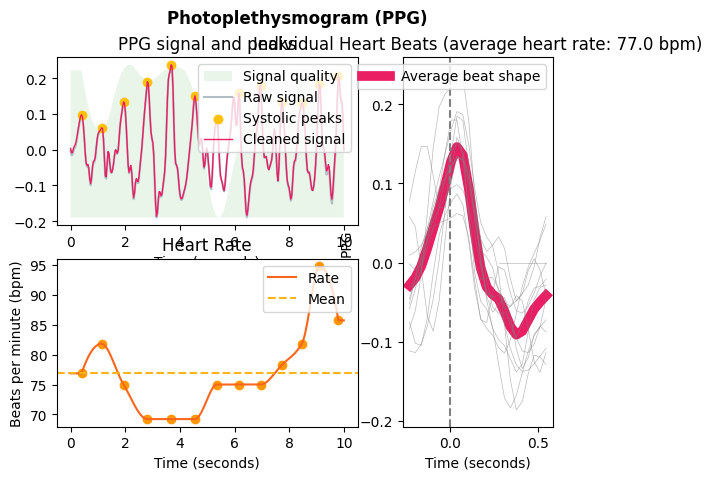

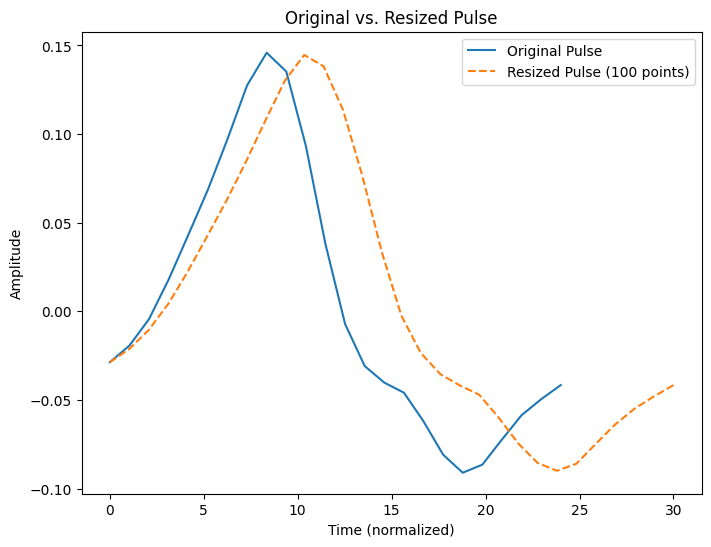

73
Qualidade: 0.9150341753211964
      PPG_Raw  PPG_Clean   PPG_Rate  PPG_Quality  PPG_Peaks
0   -0.000816   0.000379  73.062731     0.943754          0
1    0.006784   0.004788  73.062731     0.943754          0
2   -0.003942  -0.007070  73.062731     0.943754          0
3   -0.025697  -0.029148  73.062731     0.943754          0
4   -0.040102  -0.045365  73.062731     0.943754          0
..        ...        ...        ...          ...        ...
295  0.037254   0.064198  81.818182     0.985351          0
296 -0.003333   0.026747  81.818182     0.985351          0
297 -0.033899  -0.000440  81.818182     0.985351          0
298 -0.032170   0.004117  81.818182     0.985351          0
299 -0.000805   0.037442  81.818182     0.985351          0

[300 rows x 5 columns]
25


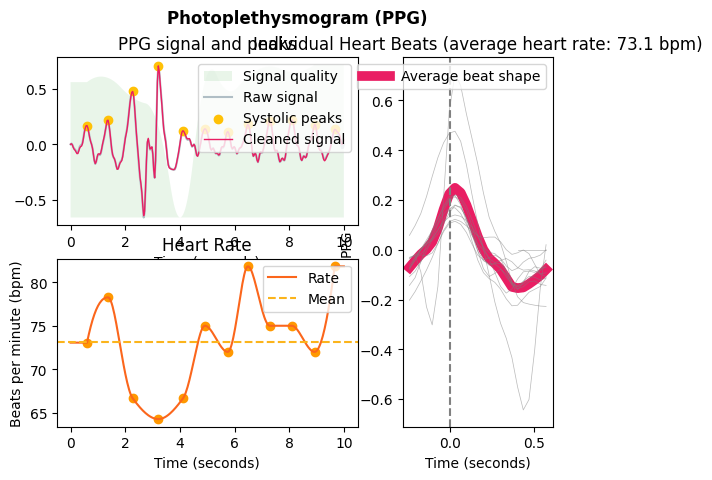

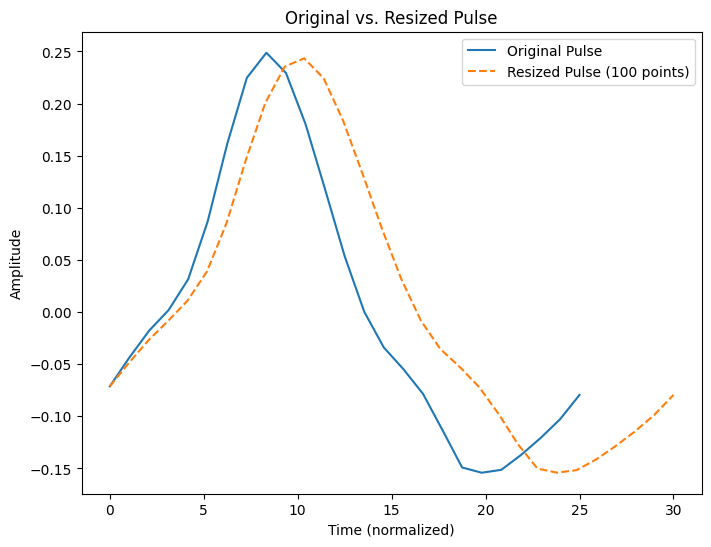

73
Qualidade: 0.9412861343011237
      PPG_Raw  PPG_Clean   PPG_Rate  PPG_Quality  PPG_Peaks
0    0.003495  -0.009616  71.739130     0.927734          0
1   -0.019178  -0.035511  71.739130     0.927734          0
2   -0.071593  -0.087157  71.739130     0.927734          0
3   -0.137480  -0.151175  71.739130     0.927734          0
4   -0.180286  -0.195307  71.739130     0.927734          0
..        ...        ...        ...          ...        ...
295  0.066232   0.072688  71.660278     0.858862          0
296  0.097928   0.102475  72.000000     0.858862          1
297  0.078899   0.086554  72.000000     0.858862          0
298  0.037037   0.046312  72.000000     0.858862          0
299  0.003500   0.008766  72.000000     0.858862          0

[300 rows x 5 columns]
25


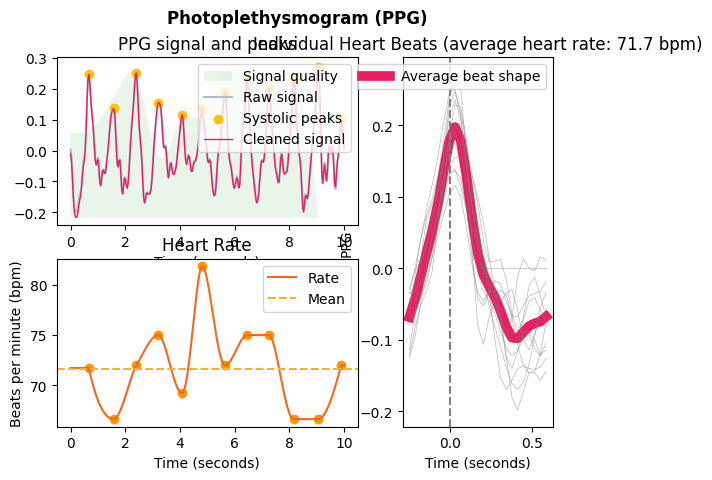

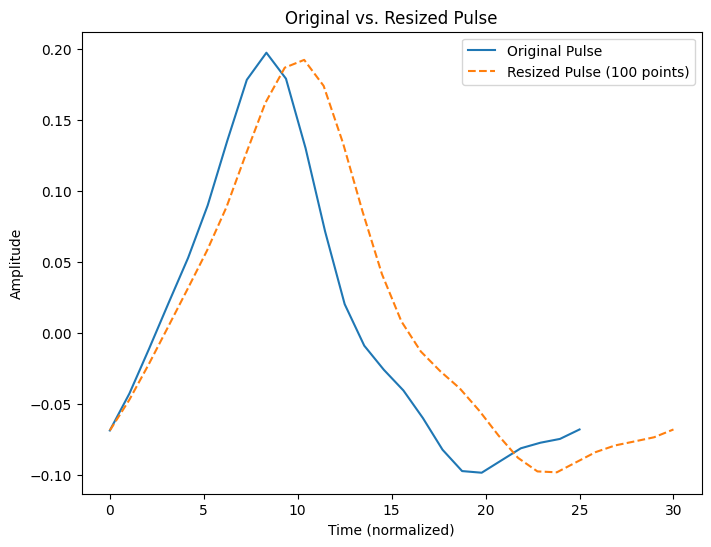

81
Qualidade: 0.864934132913184
      PPG_Raw  PPG_Clean   PPG_Rate  PPG_Quality  PPG_Peaks
0    0.001766   0.002123  73.880597     0.682617          0
1   -0.069499  -0.068765  73.880597     0.682617          0
2   -0.093534  -0.093290  73.880597     0.682617          0
3   -0.074548  -0.075413  73.880597     0.682617          0
4   -0.059370  -0.060817  73.880597     0.682617          0
..        ...        ...        ...          ...        ...
295 -0.022718  -0.005432  81.818182     0.946342          0
296  0.023447   0.043580  81.818182     0.946342          0
297  0.051515   0.073652  81.818182     0.946342          0
298  0.042575   0.067073  81.818182     0.946342          0
299  0.001758   0.029453  81.818182     0.946342          0

[300 rows x 5 columns]
24


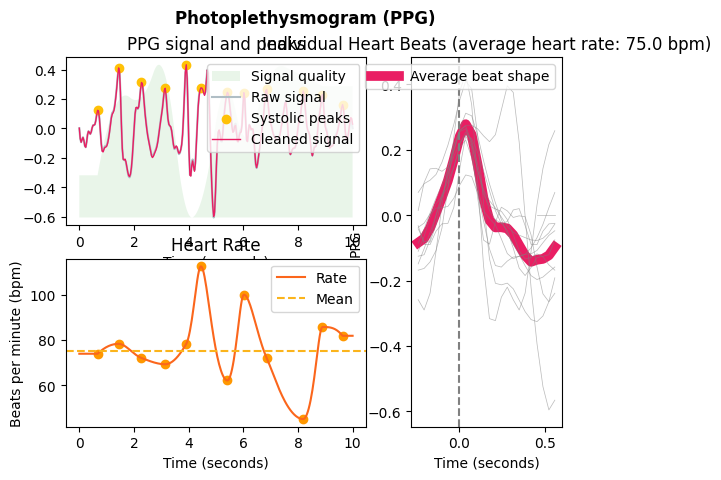

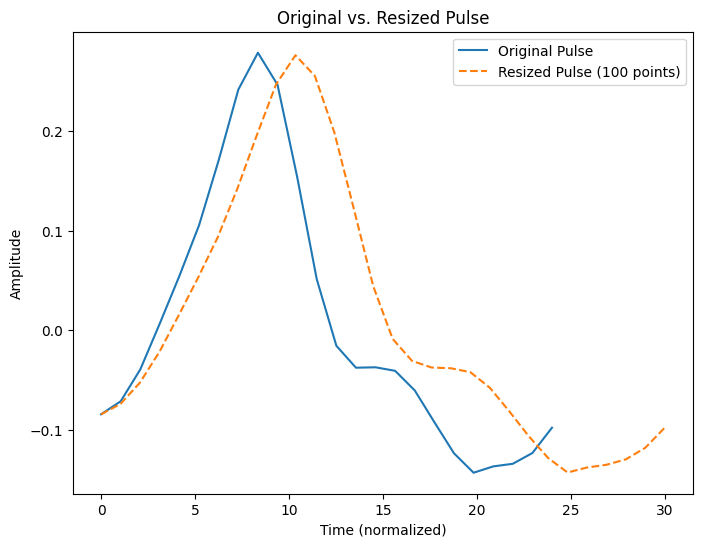

In [ ]:
import neurokit2 as nk
import numpy as np
from scipy.interpolate import interp1d
import pandas as pd

np.random.seed(SEED)
# df_nk = df_final.copy()
df_nk = df_filtered.copy()
indexes = np.random.choice(df_nk.index, 5, replace=False)

# Interpolar o average_pulse para que tenha exatamente n_points
def resize_pulse(signal, target_size):
    current_size = len(signal)
    x_old = np.linspace(0, 1, current_size)
    x_new = np.linspace(0, 1, target_size)
    interpolator = interp1d(x_old, signal, kind='linear')
    return interpolator(x_new)

n_points = 30
quality_threshold = 0.8  # Threshold para qualidade dos batimentos

for i, index in enumerate(indexes):
    # signals, info = nk.ppg_process(df_nk['ppg_r'][i], sampling_rate=30)
    print(df_nk['HR'][i])
    signals, info = nk.ppg_process(df_nk['ppg_r'][i], sampling_rate=30)
    cleaned_ppg = signals["PPG_Clean"]
    peaks = info["PPG_Peaks"]
    quality = signals["PPG_Quality"]  # Obter qualidade do sinal
    print(f"Qualidade: {quality.mean()}")
    if quality.mean() < quality_threshold:
        print(f"PPG Quality: {quality.mean()}. Pulando...")
        continue

    nk.ppg_plot(signals, info)


    epochs = nk.ppg_segment(cleaned_ppg, peaks, sampling_rate=30)
    print(signals)

    # Extrair o ciclo médio
    pulses_df = nk.epochs_to_df(epochs)
    average_pulse = pulses_df.groupby("Time")["Signal"].mean()
    print(len(average_pulse))

    # Redimensionar a forma do pulso médio
    average_pulse_resized = resize_pulse(average_pulse.values, n_points)

    # Plotar o pulso original e o interpolado
    plt.figure(figsize=(8, 6))
    plt.plot(np.linspace(0, len(average_pulse), len(average_pulse)), average_pulse, label="Original Pulse")
    plt.plot(np.linspace(0, len(average_pulse_resized), len(average_pulse_resized)), average_pulse_resized, label="Resized Pulse (30 points)", linestyle="--")
    plt.xlabel("Time (normalized)")
    plt.ylabel("Amplitude")
    plt.title("Original vs. Resized Pulse")
    plt.legend()
    plt.show()



#### Extração de ciclos

In [ ]:
import neurokit2 as nk
import numpy as np
from scipy.interpolate import interp1d
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(SEED)
df_nk = df_filtered.copy()

# Definir número de pontos para redimensionamento
n_points = 30
quality_threshold = 0.6
# Lista para armazenar os resultados
results = []
# Função para redimensionar a forma do pulso médio
def resize_pulse(signal, target_size):
    current_size = len(signal)
    x_old = np.linspace(0, 1, current_size)
    x_new = np.linspace(0, 1, target_size)
    interpolator = interp1d(x_old, signal, kind='linear')
    return interpolator(x_new)

# Função para processar um sinal PPG e calcular o pulso médio
def process_ppg_signal(ppg_signal, sampling_rate=30, quality_threshold=0.8, n_points=30):
    try:
        # Processar o PPG
        signals, info = nk.ppg_process(ppg_signal, sampling_rate=sampling_rate)
        cleaned_ppg = signals["PPG_Clean"]
        peaks = info["PPG_Peaks"]
        quality = signals["PPG_Quality"]

        # Verificar a qualidade do sinal
        if quality.mean() < quality_threshold:
            return None, None

        # Verificar se há picos detectados
        if len(peaks) < 2:
            return None, None

        # Segmentar e calcular o pulso médio
        epochs = nk.ppg_segment(cleaned_ppg, peaks, sampling_rate=sampling_rate)
        pulses_df = nk.epochs_to_df(epochs)
        average_pulse = pulses_df.groupby("Time")["Signal"].mean()

        # Redimensionar o pulso médio
        average_pulse_resized = resize_pulse(average_pulse.values, n_points)

        return average_pulse_resized, quality.mean()
    except Exception as e:
        print(f"Erro ao processar o sinal PPG: {e}")
        return None, None


for i, index in enumerate(tqdm(df_nk.index, desc="Processando registros")):
    # Obter os sinais PPG (R, G, B)
    ppg_signals = {
        "ppg_r": df_nk['ppg_r'][index],
        "ppg_g": df_nk['ppg_g'][index],
        "ppg_b": df_nk['ppg_b'][index]
    }

    row = {"Glycaemia [mg/dL]": df_nk.loc[index, "Glycaemia [mg/dL]"]}

    discard_sample = False
    for channel, signal in ppg_signals.items():
        if not isinstance(signal, np.ndarray) or len(signal) < 2:
            print(f"Sinal inválido ({channel}) no índice {index}. Pulando...")
            discard_sample = True
            break

        # Processar o sinal PPG
        average_pulse_resized, quality_mean = process_ppg_signal(signal)

        if average_pulse_resized is None:
            print(f"Sinal {channel} com qualidade abaixo do threshold no índice {index}. Descartando amostra...")
            discard_sample = True
            break

        # Adicionar os pontos redimensionados ao dicionário
        for j in range(n_points):
            row[f"{channel}_Point_{j}"] = average_pulse_resized[j]
        # row[f"{channel}_Quality"] = quality_mean
    if discard_sample:
        continue
    # Adicionar linha ao resultado
    results.append(row)


Processando registros:   0%|          | 0/463 [00:00<?, ?it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 0. Descartando amostra...


Processando registros:   2%|▏         | 7/463 [00:00<00:59,  7.68it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 5. Descartando amostra...


Processando registros:   2%|▏         | 11/463 [00:01<00:59,  7.64it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 9. Descartando amostra...


Processando registros:   3%|▎         | 13/463 [00:01<00:46,  9.69it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 11. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 12. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 13. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 14. Descartando amostra...


Processando registros:   3%|▎         | 16/463 [00:01<00:44, 10.06it/s]

Sinal ppg_b com qualidade abaixo do threshold no índice 15. Descartando amostra...


Processando registros:   4%|▍         | 19/463 [00:02<01:03,  7.04it/s]

Sinal ppg_b com qualidade abaixo do threshold no índice 17. Descartando amostra...
Sinal ppg_b com qualidade abaixo do threshold no índice 18. Descartando amostra...


Processando registros:   5%|▍         | 21/463 [00:02<01:06,  6.66it/s]

Sinal ppg_g com qualidade abaixo do threshold no índice 19. Descartando amostra...
Sinal ppg_b com qualidade abaixo do threshold no índice 20. Descartando amostra...


Processando registros:   5%|▌         | 24/463 [00:02<00:42, 10.26it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 21. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 22. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 23. Descartando amostra...


Processando registros:   8%|▊         | 38/463 [00:05<01:21,  5.23it/s]/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning:

Too few peaks detected to compute the rate. Returning empty vector.



Sinal ppg_r com qualidade abaixo do threshold no índice 38. Descartando amostra...
Erro ao processar o sinal PPG: cannot convert float NaN to integer
Sinal ppg_r com qualidade abaixo do threshold no índice 39. Descartando amostra...


Processando registros:  10%|█         | 47/463 [00:07<00:58,  7.09it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 45. Descartando amostra...


Processando registros:  15%|█▍        | 68/463 [00:10<00:58,  6.79it/s]

Sinal ppg_b com qualidade abaixo do threshold no índice 66. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 68. Descartando amostra...


Processando registros:  16%|█▌        | 73/463 [00:10<00:44,  8.77it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 71. Descartando amostra...


Processando registros:  16%|█▌        | 75/463 [00:10<00:51,  7.60it/s]

Sinal ppg_b com qualidade abaixo do threshold no índice 73. Descartando amostra...


Processando registros:  17%|█▋        | 81/463 [00:11<00:42,  9.01it/s]

Sinal ppg_b com qualidade abaixo do threshold no índice 78. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 79. Descartando amostra...


Processando registros:  18%|█▊        | 83/463 [00:12<01:01,  6.15it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 83. Descartando amostra...


Processando registros:  19%|█▉        | 88/463 [00:13<01:14,  5.03it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 86. Descartando amostra...


Processando registros:  20%|█▉        | 92/463 [00:13<01:03,  5.80it/s]

Sinal ppg_b com qualidade abaixo do threshold no índice 90. Descartando amostra...


Processando registros:  21%|██        | 96/463 [00:14<00:49,  7.39it/s]

Sinal ppg_b com qualidade abaixo do threshold no índice 93. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 94. Descartando amostra...


Processando registros:  21%|██▏       | 99/463 [00:14<00:39,  9.31it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 96. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 97. Descartando amostra...


Processando registros:  22%|██▏       | 101/463 [00:14<00:37,  9.75it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 99. Descartando amostra...


Processando registros:  23%|██▎       | 105/463 [00:15<00:48,  7.44it/s]

Sinal ppg_b com qualidade abaixo do threshold no índice 103. Descartando amostra...
Sinal ppg_b com qualidade abaixo do threshold no índice 104. Descartando amostra...


Processando registros:  23%|██▎       | 106/463 [00:15<00:49,  7.26it/s]

Sinal ppg_b com qualidade abaixo do threshold no índice 105. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 106. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 107. Descartando amostra...


Processando registros:  25%|██▍       | 115/463 [00:16<00:42,  8.20it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 113. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 115. Descartando amostra...


Processando registros:  26%|██▌       | 121/463 [00:17<00:32, 10.46it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 118. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 119. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 120. Descartando amostra...


Processando registros:  27%|██▋       | 123/463 [00:17<00:36,  9.20it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 122. Descartando amostra...


Processando registros:  27%|██▋       | 126/463 [00:18<00:48,  6.96it/s]

Sinal ppg_b com qualidade abaixo do threshold no índice 124. Descartando amostra...
Sinal ppg_b com qualidade abaixo do threshold no índice 125. Descartando amostra...


Processando registros:  28%|██▊       | 128/463 [00:18<00:53,  6.28it/s]

Sinal ppg_b com qualidade abaixo do threshold no índice 126. Descartando amostra...
Sinal ppg_b com qualidade abaixo do threshold no índice 127. Descartando amostra...


Processando registros:  28%|██▊       | 131/463 [00:19<00:49,  6.73it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 129. Descartando amostra...


Processando registros:  29%|██▊       | 133/463 [00:19<00:44,  7.45it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 131. Descartando amostra...


Processando registros:  32%|███▏      | 146/463 [00:21<00:36,  8.63it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 143. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 144. Descartando amostra...


Processando registros:  32%|███▏      | 150/463 [00:22<00:42,  7.38it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 148. Descartando amostra...


Processando registros:  33%|███▎      | 152/463 [00:22<00:41,  7.46it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 152. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 153. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 154. Descartando amostra...


Processando registros:  34%|███▍      | 159/463 [00:23<00:25, 12.00it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 156. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 157. Descartando amostra...


Processando registros:  35%|███▌      | 164/463 [00:23<00:20, 14.44it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 160. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 161. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 162. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 163. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 164. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 165. Descartando amostra...


Processando registros:  36%|███▋      | 168/463 [00:23<00:16, 18.36it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 166. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 167. Descartando amostra...


Processando registros:  38%|███▊      | 174/463 [00:23<00:15, 18.70it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 169. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 170. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 171. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 172. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 173. Descartando amostra...


Processando registros:  38%|███▊      | 177/463 [00:24<00:15, 18.85it/s]

Sinal ppg_g com qualidade abaixo do threshold no índice 174. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 175. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 176. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 177. Descartando amostra...
Sinal ppg_g com qualidade abaixo do threshold no índice 178. Descartando amostra...


Processando registros:  40%|███▉      | 184/463 [00:24<00:12, 22.02it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 179. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 180. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 181. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 182. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 183. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 184. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 185. Descartando amostra...


Processando registros:  42%|████▏     | 194/463 [00:24<00:11, 23.57it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 187. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 188. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 189. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 190. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 191. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 192. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 193. Descartando amostra...


Processando registros:  43%|████▎     | 201/463 [00:25<00:09, 26.45it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 194. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 195. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 196. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 197. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 198. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 199. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 200. Descartando amostra...


Processando registros:  44%|████▍     | 204/463 [00:25<00:11, 23.23it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 201. Descartando amostra...
Sinal ppg_g com qualidade abaixo do threshold no índice 202. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 203. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 204. Descartando amostra...


Processando registros:  45%|████▍     | 207/463 [00:25<00:13, 19.32it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 205. Descartando amostra...
Sinal ppg_b com qualidade abaixo do threshold no índice 206. Descartando amostra...


Processando registros:  45%|████▌     | 210/463 [00:25<00:18, 13.83it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 209. Descartando amostra...


Processando registros:  46%|████▌     | 212/463 [00:26<00:20, 12.18it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 211. Descartando amostra...


Processando registros:  46%|████▌     | 214/463 [00:26<00:21, 11.42it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 213. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 214. Descartando amostra...


Processando registros:  47%|████▋     | 219/463 [00:26<00:17, 13.79it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 216. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 217. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 218. Descartando amostra...


Processando registros:  49%|████▉     | 227/463 [00:27<00:14, 16.07it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 221. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 222. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 223. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 224. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 225. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 226. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 227. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 228. Descartando amostra...


Processando registros:  52%|█████▏    | 243/463 [00:29<00:33,  6.50it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 241. Descartando amostra...


Processando registros:  53%|█████▎    | 246/463 [00:30<00:21, 10.24it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 243. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 244. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 245. Descartando amostra...


Processando registros:  55%|█████▍    | 253/463 [00:31<00:29,  7.14it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 251. Descartando amostra...


Processando registros:  59%|█████▊    | 272/463 [00:35<00:43,  4.38it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 272. Descartando amostra...


Processando registros:  59%|█████▉    | 274/463 [00:35<00:36,  5.19it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 274. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 275. Descartando amostra...


Processando registros:  60%|██████    | 280/463 [00:36<00:20,  8.93it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 277. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 278. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 279. Descartando amostra...


Processando registros:  64%|██████▍   | 296/463 [00:38<00:15, 11.09it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 292. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 293. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 294. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 295. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 296. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 297. Descartando amostra...


Processando registros:  65%|██████▌   | 301/463 [00:39<00:14, 10.97it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 299. Descartando amostra...
Sinal ppg_b com qualidade abaixo do threshold no índice 300. Descartando amostra...


Processando registros:  65%|██████▌   | 303/463 [00:39<00:16,  9.96it/s]

Sinal ppg_b com qualidade abaixo do threshold no índice 301. Descartando amostra...
Sinal ppg_g com qualidade abaixo do threshold no índice 302. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 303. Descartando amostra...


Processando registros:  67%|██████▋   | 309/463 [00:39<00:10, 14.37it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 305. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 306. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 307. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 308. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 309. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 310. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 311. Descartando amostra...


Processando registros:  68%|██████▊   | 315/463 [00:40<00:11, 12.73it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 314. Descartando amostra...


Processando registros:  69%|██████▉   | 319/463 [00:40<00:12, 11.18it/s]

Sinal ppg_g com qualidade abaixo do threshold no índice 316. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 318. Descartando amostra...


Processando registros:  69%|██████▉   | 321/463 [00:40<00:12, 10.98it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 319. Descartando amostra...


Processando registros:  70%|██████▉   | 323/463 [00:41<00:14,  9.80it/s]

Sinal ppg_g com qualidade abaixo do threshold no índice 322. Descartando amostra...
Sinal ppg_g com qualidade abaixo do threshold no índice 323. Descartando amostra...


Processando registros:  71%|███████▏  | 330/463 [00:41<00:09, 13.48it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 326. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 327. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 328. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 329. Descartando amostra...


Processando registros:  72%|███████▏  | 332/463 [00:41<00:11, 11.85it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 331. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 332. Descartando amostra...


Processando registros:  73%|███████▎  | 336/463 [00:42<00:12, 10.34it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 334. Descartando amostra...


Processando registros:  74%|███████▎  | 341/463 [00:42<00:10, 11.20it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 338. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 339. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 340. Descartando amostra...


Processando registros:  74%|███████▍  | 343/463 [00:43<00:11, 10.57it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 342. Descartando amostra...


Processando registros:  75%|███████▌  | 349/463 [00:43<00:13,  8.34it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 347. Descartando amostra...


Processando registros:  76%|███████▌  | 353/463 [00:44<00:09, 11.52it/s]

Sinal ppg_b com qualidade abaixo do threshold no índice 349. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 350. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 351. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 352. Descartando amostra...
Erro ao processar o sinal PPG: cannot convert float NaN to integer
Sinal ppg_r com qualidade abaixo do threshold no índice 353. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 354. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 355. Descartando amostra...


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning:

Too few peaks detected to compute the rate. Returning empty vector.

Processando registros:  78%|███████▊  | 360/463 [00:44<00:05, 17.61it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 356. Descartando amostra...
Sinal ppg_g com qualidade abaixo do threshold no índice 357. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 358. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 359. Descartando amostra...


Processando registros:  78%|███████▊  | 363/463 [00:44<00:06, 14.89it/s]

Sinal ppg_g com qualidade abaixo do threshold no índice 360. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 361. Descartando amostra...


Processando registros:  79%|███████▉  | 365/463 [00:44<00:07, 13.92it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 364. Descartando amostra...


Processando registros:  80%|███████▉  | 370/463 [00:45<00:07, 13.08it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 367. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 368. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 369. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 370. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 371. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 372. Descartando amostra...


Processando registros:  81%|████████  | 374/463 [00:45<00:05, 17.10it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 373. Descartando amostra...


Processando registros:  81%|████████▏ | 377/463 [00:45<00:06, 12.82it/s]

Sinal ppg_g com qualidade abaixo do threshold no índice 375. Descartando amostra...


Processando registros:  82%|████████▏ | 381/463 [00:46<00:07, 10.82it/s]

Sinal ppg_b com qualidade abaixo do threshold no índice 378. Descartando amostra...
Sinal ppg_b com qualidade abaixo do threshold no índice 379. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 380. Descartando amostra...
Sinal ppg_g com qualidade abaixo do threshold no índice 381. Descartando amostra...


Processando registros:  83%|████████▎ | 385/463 [00:47<00:10,  7.45it/s]

Sinal ppg_b com qualidade abaixo do threshold no índice 384. Descartando amostra...


Processando registros:  83%|████████▎ | 386/463 [00:47<00:11,  6.57it/s]/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning:

Too few peaks detected to compute the rate. Returning empty vector.



Sinal ppg_r com qualidade abaixo do threshold no índice 386. Descartando amostra...
Erro ao processar o sinal PPG: cannot convert float NaN to integer
Sinal ppg_r com qualidade abaixo do threshold no índice 387. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 388. Descartando amostra...


Processando registros:  84%|████████▍ | 390/463 [00:47<00:08,  8.81it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 390. Descartando amostra...


Processando registros:  85%|████████▌ | 394/463 [00:48<00:07,  9.80it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 392. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 393. Descartando amostra...


Processando registros:  87%|████████▋ | 401/463 [00:49<00:06,  9.13it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 398. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 399. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 400. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 401. Descartando amostra...


Processando registros:  87%|████████▋ | 403/463 [00:49<00:06,  9.89it/s]

Sinal ppg_g com qualidade abaixo do threshold no índice 402. Descartando amostra...


Processando registros:  88%|████████▊ | 409/463 [00:50<00:07,  7.43it/s]

Sinal ppg_g com qualidade abaixo do threshold no índice 406. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 407. Descartando amostra...
Sinal ppg_g com qualidade abaixo do threshold no índice 408. Descartando amostra...


Processando registros:  89%|████████▉ | 411/463 [00:50<00:05,  9.23it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 409. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 410. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 411. Descartando amostra...


Processando registros:  89%|████████▉ | 413/463 [00:50<00:05,  8.51it/s]

Sinal ppg_b com qualidade abaixo do threshold no índice 412. Descartando amostra...
Sinal ppg_r com qualidade abaixo do threshold no índice 413. Descartando amostra...


Processando registros:  90%|████████▉ | 416/463 [00:51<00:06,  6.72it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 416. Descartando amostra...


Processando registros:  95%|█████████▌| 440/463 [00:55<00:03,  6.75it/s]

Sinal ppg_r com qualidade abaixo do threshold no índice 438. Descartando amostra...
Erro ao processar o sinal PPG: cannot convert float NaN to integer
Sinal ppg_r com qualidade abaixo do threshold no índice 440. Descartando amostra...


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning:

Too few peaks detected to compute the rate. Returning empty vector.

Processando registros: 100%|██████████| 463/463 [00:59<00:00,  7.80it/s]


In [ ]:
# Converter a lista de resultados para um DataFrame
result_df = pd.DataFrame(results)

# Exibir o DataFrame final
print(result_df.head())
print(result_df.shape)

   Glycaemia [mg/dL]  ppg_r_Point_0  ppg_r_Point_1  ppg_r_Point_2  \
0              124.2      -0.028676      -0.021246      -0.010529   
1              124.2      -0.071250      -0.048354      -0.026859   
2              124.2      -0.068412      -0.046892      -0.021854   
3              124.2      -0.084181      -0.073813      -0.052388   
4              124.2      -0.113347      -0.085021      -0.048019   

   ppg_r_Point_3  ppg_r_Point_4  ppg_r_Point_5  ppg_r_Point_6  ppg_r_Point_7  \
0       0.004115       0.022272       0.042208       0.062405       0.084317   
1      -0.008468       0.010978       0.039028       0.085015       0.146031   
2       0.004578       0.031189       0.058243       0.088809       0.126117   
3      -0.021615       0.015348       0.053198       0.093295       0.141462   
4      -0.009918       0.023855       0.054594       0.091122       0.144344   

   ppg_r_Point_8  ...  ppg_b_Point_20  ppg_b_Point_21  ppg_b_Point_22  \
0       0.107578  ...       -0.

#### Extração de features

In [ ]:
import pandas as pd

# Cálculo de diferenças e médias entre pontos consecutivos
def compute_interaction_features(df, channel_prefix, n_points):
    """
    Calcula diferenças e médias entre pontos consecutivos para um canal específico.
    Adiciona as novas colunas ao DataFrame original.

    Parâmetros:
    - df: DataFrame original.
    - channel_prefix: Prefixo do canal (ex.: "ppg_r").
    - n_points: Número de pontos no canal.
    """
    new_features = {}

    for i in range(n_points - 1):
        col1 = f"{channel_prefix}_Point_{i}"
        col2 = f"{channel_prefix}_Point_{i + 1}"

        # Diferença entre pontos consecutivos
        new_features[f"{channel_prefix}_Diff_{i}_{i+1}"] = df[col2] - df[col1]

        # Média entre pontos consecutivos
        new_features[f"{channel_prefix}_Avg_{i}_{i+1}"] = (df[col2] + df[col1]) / 2

    return pd.DataFrame(new_features)

# Número de pontos no canal
n_points = 30

# Computar features para cada canal
ppg_r_features = compute_interaction_features(result_df, "ppg_r", n_points)
ppg_g_features = compute_interaction_features(result_df, "ppg_g", n_points)
ppg_b_features = compute_interaction_features(result_df, "ppg_b", n_points)

# Combinar as novas features ao DataFrame original
result_df = pd.concat([result_df, ppg_r_features, ppg_g_features, ppg_b_features], axis=1)

# Verificar o DataFrame resultante
result_df.head()


,Glycaemia [mg/dL],ppg_r_Point_0,ppg_r_Point_1,ppg_r_Point_2,ppg_r_Point_3,ppg_r_Point_4,ppg_r_Point_5,ppg_r_Point_6,ppg_r_Point_7,ppg_r_Point_8,...,ppg_b_Diff_24_25,ppg_b_Avg_24_25,ppg_b_Diff_25_26,ppg_b_Avg_25_26,ppg_b_Diff_26_27,ppg_b_Avg_26_27,ppg_b_Diff_27_28,ppg_b_Avg_27_28,ppg_b_Diff_28_29,ppg_b_Avg_28_29
0,124.2,-0.028676,-0.021246,-0.010529,0.004115,0.022272,0.042208,0.062405,0.084317,0.107578,...,0.003104,-0.096885,0.003816,-0.093425,0.005395,-0.088820,0.007935,-0.082155,0.011544,-0.072415
1,124.2,-0.071250,-0.048354,-0.026859,-0.008468,0.010978,0.039028,0.085015,0.146031,0.200675,...,-0.006375,-0.208436,0.004708,-0.209270,0.019226,-0.197303,0.033429,-0.170975,0.042468,-0.133027
2,124.2,-0.068412,-0.046892,-0.021854,0.004578,0.031189,0.058243,0.088809,0.126117,0.162188,...,0.007975,-0.152447,0.009800,-0.143560,0.011374,-0.132973,0.013272,-0.120650,0.015749,-0.106139
3,124.2,-0.084181,-0.073813,-0.052388,-0.021615,0.015348,0.053198,0.093295,0.141462,0.195041,...,0.011223,-0.194945,0.006774,-0.185947,0.012986,-0.176067,0.017979,-0.160584,0.022938,-0.140126
4,124.2,-0.113347,-0.085021,-0.048019,-0.009918,0.023855,0.054594,0.091122,0.144344,0.217004,...,0.019003,-0.270824,0.027535,-0.247555,0.032650,-0.217463,0.035754,-0.183261,0.039120,-0.145824


In [ ]:
import pandas as pd
import numpy as np

# Funções para calcular as novas features
def calculate_peak_to_valley(signal):
    """Calcula a diferença entre o pico (máximo) e o vale (mínimo) de um sinal."""
    return np.max(signal, axis=1) - np.min(signal, axis=1)

def calculate_slope(signal):
    """Calcula a inclinação (diferença entre pontos consecutivos)."""
    return np.mean(np.abs(np.diff(signal, axis=1)), axis=1)

def calculate_area(signal):
    """Calcula a área sob a curva (soma dos valores)."""
    return np.sum(signal, axis=1)

def calculate_integral_by_window(signal, window, sampling_interval=1):
    """
    Calcula a área sob a curva para janelas específicas usando integração (regra do trapézio).

    Parâmetros:
    - signal: numpy array 2D, onde cada linha é um sinal PPG.
    - window: Tamanho da janela (quantidade de pontos em cada segmento).
    - sampling_interval: Intervalo de amostragem (padrão: 1, para sinais uniformes).

    Retorno:
    - areas: numpy array 2D, onde cada linha contém as áreas para cada janela.
    """
    num_points = signal.shape[1]
    num_windows = num_points // window  # Número de janelas completas
    areas = np.zeros((signal.shape[0], num_windows))  # Inicializar matriz para áreas

    for i in range(num_windows):
        start = i * window
        end = start + window
        areas[:, i] = np.trapz(signal[:, start:end], dx=sampling_interval, axis=1)

    return areas

# Aplicar funções para cada canal
def add_waveform_features(df, channel_prefix):
    """
    Adiciona features baseadas na forma da onda para um canal específico.
    - df: DataFrame com os dados.
    - channel_prefix: Prefixo das colunas do canal (ex: 'ppg_r_').
    """
    # Selecionar apenas os pontos do canal
    point_columns = [col for col in df.columns if col.startswith(f"{channel_prefix}Point_")]
    signal = df[point_columns].values
    window = 5  # Tamanho da janela (10 pontos)
    sampling_interval = 1  # Intervalo de amostragem (ex: 1 segundo)
    areas = calculate_integral_by_window(signal, window, sampling_interval=sampling_interval)
    for i in range(areas.shape[1]):
        result_df[f"{channel_prefix}Area_Window_{i}"] = areas[:, i]

    return df

# Aplicar as features aos canais R, G e B
result_df = add_waveform_features(result_df, "ppg_r_")
result_df = add_waveform_features(result_df, "ppg_g_")
result_df = add_waveform_features(result_df, "ppg_b_")


## Extração de features

#### Seleção de features para treinamento

In [ ]:
import pandas as pd

X = result_df.drop(columns=['Glycaemia [mg/dL]'])
y = result_df['Glycaemia [mg/dL]']


print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (250, 282)
y shape: (250,)


In [ ]:
print(X.head())

   ppg_r_Point_0  ppg_r_Point_1  ppg_r_Point_2  ppg_r_Point_3  ppg_r_Point_4  \
0      -0.028676      -0.021246      -0.010529       0.004115       0.022272   
1      -0.071250      -0.048354      -0.026859      -0.008468       0.010978   
2      -0.068412      -0.046892      -0.021854       0.004578       0.031189   
3      -0.084181      -0.073813      -0.052388      -0.021615       0.015348   
4      -0.113347      -0.085021      -0.048019      -0.009918       0.023855   

   ppg_r_Point_5  ppg_r_Point_6  ppg_r_Point_7  ppg_r_Point_8  ppg_r_Point_9  \
0       0.042208       0.062405       0.084317       0.107578       0.129987   
1       0.039028       0.085015       0.146031       0.200675       0.235454   
2       0.058243       0.088809       0.126117       0.162188       0.187030   
3       0.053198       0.093295       0.141462       0.195041       0.246475   
4       0.054594       0.091122       0.144344       0.217004       0.293684   

   ...  ppg_g_Area_Window_2  ppg_g_Are

## Treinamento do modelo

### Config

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
from catboost.utils import get_gpu_device_count
if get_gpu_device_count() > 0:
    print("GPU disponível. Usando GPU para treinamento.")
    task_type = "GPU"
    devices = '0'  # Especifique a GPU, se necessário
else:
    print("GPU não disponível. Usando CPU para treinamento.")
    task_type = "CPU"
    devices = None  # Não é necessário especificar dispositivo para CPU

GPU não disponível. Usando CPU para treinamento.


In [ ]:
# https://github.com/kriventsov/Clarke-and-Parkes-Error-Grids/blob/master/error_grids.py
"""
Implementation of Clarke and Parkes error grid analysis
"""

import numpy as np

def clarke_error_zone_detailed(act, pred):
    """
    This function outputs the Clarke Error Grid region (encoded as integer)
    for a combination of actual and predicted value

    Based on 'Evaluating clinical accuracy of systems for self-monitoring of blood glucose':
    https://care.diabetesjournals.org/content/10/5/622
    """
    # Zone A
    if (act < 70 and pred < 70) or abs(act - pred) < 0.2 * act:
        return 0
    # Zone E - left upper
    if act <= 70 and pred >= 180:
        return 8
    # Zone E - right lower
    if act >= 180 and pred <= 70:
        return 7
    # Zone D - right
    if act >= 240 and 70 <= pred <= 180:
        return 6
    # Zone D - left
    if act <= 70 <= pred <= 180:
        return 5
    # Zone C - upper
    if 70 <= act <= 290 and pred >= act + 110:
        return 4
    # Zone C - lower
    if 130 <= act <= 180 and pred <= (7/5) * act - 182:
        return 3
    # Zone B - upper
    if act < pred:
        return 2
    # Zone B - lower
    return 1

def parkes_error_zone_detailed(act, pred, diabetes_type):
    """
    This function outputs the Parkes Error Grid region (encoded as integer)
    for a combination of actual and predicted value
    for type 1 and type 2 diabetic patients

    Based on the article 'Technical Aspects of the Parkes Error Grid':
    https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3876371/
    """
    def above_line(x_1, y_1, x_2, y_2, strict=False):
        if x_1 == x_2:
            return False

        y_line = ((y_1 - y_2) * act + y_2 * x_1 - y_1 * x_2) / (x_1 - x_2)
        return pred > y_line if strict else pred >= y_line

    def below_line(x_1, y_1, x_2, y_2, strict=False):
        return not above_line(x_1, y_1, x_2, y_2, not strict)

    def parkes_type_1(act, pred):
        # Zone E
        if above_line(0, 150, 35, 155) and above_line(35, 155, 50, 550):
            return 7
        # Zone D - left upper
        if (pred > 100 and above_line(25, 100, 50, 125) and
                above_line(50, 125, 80, 215) and above_line(80, 215, 125, 550)):
            return 6
        # Zone D - right lower
        if (act > 250 and below_line(250, 40, 550, 150)):
            return 5
        # Zone C - left upper
        if (pred > 60 and above_line(30, 60, 50, 80) and
                above_line(50, 80, 70, 110) and above_line(70, 110, 260, 550)):
            return 4
        # Zone C - right lower
        if (act > 120 and below_line(120, 30, 260, 130) and below_line(260, 130, 550, 250)):
            return 3
        # Zone B - left upper
        if (pred > 50 and above_line(30, 50, 140, 170) and
                above_line(140, 170, 280, 380) and (act < 280 or above_line(280, 380, 430, 550))):
            return 2
        # Zone B - right lower
        if (act > 50 and below_line(50, 30, 170, 145) and
                below_line(170, 145, 385, 300) and (act < 385 or below_line(385, 300, 550, 450))):
            return 1
        # Zone A
        return 0

    def parkes_type_2(act, pred):
        # Zone E
        if (pred > 200 and above_line(35, 200, 50, 550)):
            return 7
        # Zone D - left upper
        if (pred > 80 and above_line(25, 80, 35, 90) and above_line(35, 90, 125, 550)):
            return 6
        # Zone D - right lower
        if (act > 250 and below_line(250, 40, 410, 110) and below_line(410, 110, 550, 160)):
            return 5
        # Zone C - left upper
        if (pred > 60 and above_line(30, 60, 280, 550)):
            return 4
        # Zone C - right lower
        if (below_line(90, 0, 260, 130) and below_line(260, 130, 550, 250)):
            return 3
        # Zone B - left upper
        if (pred > 50 and above_line(30, 50, 230, 330) and
                (act < 230 or above_line(230, 330, 440, 550))):
            return 2
        # Zone B - right lower
        if (act > 50 and below_line(50, 30, 90, 80) and below_line(90, 80, 330, 230) and
                (act < 330 or below_line(330, 230, 550, 450))):
            return 1
        # Zone A
        return 0

    if diabetes_type == 1:
        return parkes_type_1(act, pred)

    if diabetes_type == 2:
        return parkes_type_2(act, pred)

    raise Exception('Unsupported diabetes type')

clarke_error_zone_detailed = np.vectorize(clarke_error_zone_detailed)
parkes_error_zone_detailed = np.vectorize(parkes_error_zone_detailed)

def zone_accuracy(act_arr, pred_arr, mode='clarke', detailed=False, diabetes_type=1):
    """
    Calculates the average percentage of each zone based on Clarke or Parkes
    Error Grid analysis for an array of predictions and an array of actual values
    """
    acc = np.zeros(9)
    if mode == 'clarke':
        res = clarke_error_zone_detailed(act_arr, pred_arr)
    elif mode == 'parkes':
        res = parkes_error_zone_detailed(act_arr, pred_arr, diabetes_type)
    else:
        raise Exception('Unsupported error grid mode')

    acc_bin = np.bincount(res)
    acc[:len(acc_bin)] = acc_bin

    if not detailed:
        acc[1] = acc[1] + acc[2]
        acc[2] = acc[3] + acc[4]
        acc[3] = acc[5] + acc[6]
        acc[4] = acc[7] + acc[8]
        acc = acc[:5]

    return acc / sum(acc)

In [ ]:
# https://www.researchgate.net/figure/Parkes-error-grid-This-grid-assigns-an-error-severity-level-from-A-to-E-E-high-based_fig2_358820426

import numpy as np
import plotly.graph_objects as go

def plot_error_grid(y_real, y_pred, y_min=None, y_max=None, diabetes_type=1, err_grid="clarke", annotation=None):
    """
    Plota o Parkes Error Grid usando os valores reais e previstos.

    Parâmetros:
    - y_real: array-like, valores reais.
    - y_pred: array-like, valores previstos.
    - diabetes_type: int, tipo de diabetes (1 ou 2).
    - title: str, título do gráfico.

    Retorna:
    - None. Exibe o gráfico interativo.
    """
    # Garantir que os dados são arrays NumPy
    y_r = np.array(y_real)
    y_p = np.array(y_pred)

    # Calcular zonas usando Parkes Error Grid (para diabetes tipo 1)
    if err_grid == "parkes":
        title="Parkes Error Grid"
        zones = parkes_error_zone_detailed(y_r, y_p, diabetes_type)
    else:
        title="Clarke Error Grid"
        zones = clarke_error_zone_detailed(y_r, y_p)
    # Mapear cores para cada zona
    zone_colors = {'A': 'green', 'B': 'yellow', 'C': 'orange', 'D': 'red', 'E': 'purple'}

    # Mapeamento numérico para letras das zonas
    zone_labels = {0: 'A', 1: 'B', 2: 'B', 3: 'C', 4: 'C', 5: 'D', 6: 'D', 7: 'E', 8: 'E'}

    # Agrupar dados por zona
    zone_data = {}
    for i, zone in enumerate(zones):
        label = zone_labels[zone]
        if label not in zone_data:
            zone_data[label] = {'x': [], 'y': [], 'indices': []}
        zone_data[label]['x'].append(y_r[i])
        zone_data[label]['y'].append(y_p[i])
        zone_data[label]['indices'].append(i)  # Adiciona os índices

    # Calcular porcentagens para cada zona
    total_points = len(zones)
    zone_counts = {label: len(data['x']) for label, data in zone_data.items()}
    zone_percentages = {label: (count / total_points) * 100 for label, count in zone_counts.items()}

    # Exibir porcentagens
    print("Porcentagens por Zona:")
    for label, percentage in zone_percentages.items():
        print(f"Zona {label}: {percentage:.2f}%")

    # Criar gráfico de dispersão
    fig = go.Figure()

    # Adicionar pontos para cada zona (A, B, C, D, E)
    for label, data in zone_data.items():
        fig.add_trace(go.Scatter(
            x=data['x'],
            y=data['y'],
            mode='markers',
            marker=dict(size=8, color=zone_colors[label], opacity=0.7),
            text=data['indices'],  # Adiciona os índices
            hovertemplate="<b>Índice:</b> %{text}<br>" +  # Mostra índice
                          "<b>Real:</b> %{x:.2f}<br>" +  # Valor real
                          "<b>Previsto:</b> %{y:.2f}<br>" +  # Valor previsto
                          f"<b>Zona:</b> {label}<extra></extra>",
            name=f'Zona {label}'
        ))

    fig_y_min = 0
    fig_y_max = max(y_r)
    if y_max is not None:
        fig_y_max = y_max
    if y_min is not None:
        fig_y_min = y_min

    # Adicionar linha de identidade (y = x)
    fig.add_trace(go.Scatter(
        x=[fig_y_min, fig_y_max],
        y=[fig_y_min, fig_y_max],
        mode='lines',
        line=dict(color='black', dash='dash'),
        name='Identidade'
    ))

    if annotation is not None:
        # Verificar se annotation é um array
        if isinstance(annotation, list):
            # Concatenar as strings do array com quebras de linha
            text = "<br>".join(annotation)
        else:
            # Usar diretamente a string única
            text = annotation

        # Adicionar a anotação ao gráfico
        fig.add_annotation(
            xref="paper", yref="paper",
            x=0.05, y=0.95,
            text=text,
            showarrow=False,
            font=dict(size=12)
        )
    # Configurações do layout
    fig.update_layout(
        title=title,
        xaxis_title="Valores Reais de Glicemia",
        yaxis_title="Previsões de Glicemia",
        showlegend=True,
        template="plotly_white",
        width=800,
        height=800
    )

    # Mostrar gráfico
    fig.show()


### Seleção dos dados de treino e teste

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import numpy as np
import time
import matplotlib.pyplot as plt

# Separar os dados em conjuntos de treino e teste

# Normalizar os dados combinados
scaler_std = StandardScaler()
scaler_std.set_output(transform='pandas')

X_standardized = scaler_std.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.3, random_state=42)

In [ ]:
print(X_standardized.head())

   ppg_r_Point_0  ppg_r_Point_1  ppg_r_Point_2  ppg_r_Point_3  ppg_r_Point_4  \
0       0.434653       0.098580      -0.336757      -0.637267      -0.781213   
1       0.106013      -0.152958      -0.489042      -0.734904      -0.850802   
2       0.127919      -0.139397      -0.442373      -0.633674      -0.726273   
3       0.006189      -0.389190      -0.727120      -0.836916      -0.823880   
4      -0.218952      -0.493195      -0.686374      -0.746154      -0.771460   

   ppg_r_Point_5  ppg_r_Point_6  ppg_r_Point_7  ppg_r_Point_8  ppg_r_Point_9  \
0      -0.831178      -0.839079      -0.832589      -0.835725      -0.829796   
1      -0.846625      -0.751870      -0.640600      -0.591191      -0.580285   
2      -0.753308      -0.737235      -0.702551      -0.692283      -0.694844   
3      -0.777805      -0.719932      -0.654811      -0.605987      -0.554212   
4      -0.771027      -0.728315      -0.645847      -0.548298      -0.442526   

   ...  ppg_g_Area_Window_2  ppg_g_Are

In [ ]:
print(X_test.head())

     ppg_r_Point_0  ppg_r_Point_1  ppg_r_Point_2  ppg_r_Point_3  \
142      -1.394623      -1.114345      -0.485458       0.152705   
6        -0.098587      -0.334472      -0.639276      -0.805427   
97        0.923086       0.767893       0.285952      -0.075097   
60        0.534003       0.223476      -0.238093      -0.598494   
112      -0.004677      -0.338035      -0.648944      -0.770929   

     ppg_r_Point_4  ppg_r_Point_5  ppg_r_Point_6  ppg_r_Point_7  \
142       0.596982       0.802254       0.792648       0.711557   
6        -0.806675      -0.721527      -0.630519      -0.566833   
97       -0.126357      -0.108761      -0.188290      -0.308894   
60       -0.794043      -0.872491      -0.886375      -0.877018   
112      -0.760687      -0.708154      -0.649608      -0.607182   

     ppg_r_Point_8  ppg_r_Point_9  ...  ppg_g_Area_Window_2  \
142       0.710886       0.781997  ...            -0.592995   
6        -0.538577      -0.534180  ...            -0.103043   
97   

In [ ]:
print(X.columns)
print(y)

Index(['ppg_r_Point_0', 'ppg_r_Point_1', 'ppg_r_Point_2', 'ppg_r_Point_3',
       'ppg_r_Point_4', 'ppg_r_Point_5', 'ppg_r_Point_6', 'ppg_r_Point_7',
       'ppg_r_Point_8', 'ppg_r_Point_9',
       ...
       'ppg_g_Area_Window_2', 'ppg_g_Area_Window_3', 'ppg_g_Area_Window_4',
       'ppg_g_Area_Window_5', 'ppg_b_Area_Window_0', 'ppg_b_Area_Window_1',
       'ppg_b_Area_Window_2', 'ppg_b_Area_Window_3', 'ppg_b_Area_Window_4',
       'ppg_b_Area_Window_5'],
      dtype='object', length=282)
0      124.2
1      124.2
2      124.2
3      124.2
4      124.2
       ...  
245    183.6
246    183.6
247    183.6
248    183.6
249    183.6
Name: Glycaemia [mg/dL], Length: 250, dtype: float64


In [ ]:
print(X)

     ppg_r_Point_0  ppg_r_Point_1  ppg_r_Point_2  ppg_r_Point_3  \
0        -0.028676      -0.021246      -0.010529       0.004115   
1        -0.071250      -0.048354      -0.026859      -0.008468   
2        -0.068412      -0.046892      -0.021854       0.004578   
3        -0.084181      -0.073813      -0.052388      -0.021615   
4        -0.113347      -0.085021      -0.048019      -0.009918   
..             ...            ...            ...            ...   
245      -0.008474       0.122611       0.256627       0.392481   
246      -0.022152       0.102656       0.229371       0.357730   
247       0.034223       0.134465       0.235357       0.336110   
248       0.018292       0.130523       0.244690       0.359663   
249      -0.163927      -0.040227       0.086070       0.212817   

     ppg_r_Point_4  ppg_r_Point_5  ppg_r_Point_6  ppg_r_Point_7  \
0         0.022272       0.042208       0.062405       0.084317   
1         0.010978       0.039028       0.085015       0.1460

### Treinamento do modelo de regressão CatBoost

In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Instanciar o modelo CatBoost
cat_model = CatBoostRegressor(iterations=1000,
                              learning_rate=0.01,
                              depth=5,
                              verbose=0,
                              task_type=task_type,
                              devices=devices,
                              random_seed=42)

# Iniciar o cronômetro
start_time = time.time()

# Treinar o modelo
cat_model.fit(X_train, y_train)

# Tempo de treinamento
training_time_cat = time.time() - start_time

# Fazer previsões
y_pred_cat = cat_model.predict(X_test)

# Calcular as métricas
mse_cat = mean_squared_error(y_test, y_pred_cat)
rmse_cat = np.sqrt(mse_cat)
mae_cat = mean_absolute_error(y_test, y_pred_cat)
r2_cat = r2_score(y_test, y_pred_cat)
mape_cat = mean_absolute_percentage_error(y_test, y_pred_cat)
rmsle_cat = np.sqrt(mean_squared_error(np.log1p(y_test), np.log1p(y_pred_cat)))

# Exibir as métricas
print("CatBoost Regressor:")
print(f"MAE: {mae_cat}")
print(f"MSE: {mse_cat}")
print(f"RMSE: {rmse_cat}")
print(f"R²: {r2_cat}")
print(f"RMSLE: {rmsle_cat}")
print(f"MAPE: {mape_cat}")
print(f"Tempo de Treinamento: {training_time_cat:.2f} segundos")


CatBoost Regressor:
MAE: 13.37202425821669
MSE: 339.7996535805806
RMSE: 18.433655458985356
R²: 0.7528453582898587
RMSLE: 0.15568727702512028
MAPE: 0.12133361008203951
Tempo de Treinamento: 37.39 segundos


In [ ]:
print(scaler_std.mean_, scaler_std.scale_)  # Verificar estatísticas usadas no scaler
print((X_train.columns == X_test.columns).all())  # Deve ser True


In [ ]:
plot_error_grid(y_test, y_pred_cat, y_min=25, y_max=300, #err_grid="parkes",
    annotation=[
    f"R²: {r2_cat:.2f}",
    f"MAE: {mae_cat:.2f} mg/dL",
    f"MAPE: {mape_cat:.2f}%",
    f"RMSE: {rmse_cat:.2f} mg/dL"
    ]
)

Porcentagens por Zona:
Zona A: 77.33%
Zona B: 22.67%


In [ ]:
# Caminho para salvar o modelo
model_path_sem_pca = "/content/drive/MyDrive/Colab Notebooks/Mestrado/Visao/catboost_model_glicemia_finger.cbm"

# Salvar o modelo
cat_model.save_model(model_path_sem_pca)

print(f"Modelo salvo em: {model_path_sem_pca}")

Modelo salvo em: /content/drive/MyDrive/Colab Notebooks/Mestrado/Visao/catboost_model_glicemia_finger.cbm
